In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Correlation

## Pearson's product-moment coefficient

https://en.wikipedia.org/wiki/Correlation_and_dependence#Pearson's_product-moment_coefficient

Inicialmente me confundí y pense que la sintaxis XY se referia a distribuciones de probabilidad conjuntas pero son temas diferentes.

### Formula 1

<img src="images/formula-1.png"/>

### Formula 2

<img src="images/formula-2.png"/>

### Ejemplo con 2 variables discretas


In [2]:
E = np.mean
S = np.std

X = np.array([1, 1, 0])
Y = np.array([-1, 0, 1])

In [3]:
## Formula 1

XY = []
for i in X - E(X):
    for j in Y - E(Y):
        XY.append(i*j)

numerator = E(XY)
denominator = S(X)*S(Y)

MSG = """
No hay ninguna relación entre las 2 variables: {}
"""

print(MSG.format(numerator/denominator))


No hay ninguna relación entre las 2 variables: 0.0



In [4]:
## Formula 2

XY = []
for i in X:
    for j in Y:
        XY.append(i*j)

numerator = E(XY) - E(X)*E(Y)
denominator = (E(X**2) - E(X)**2)**0.5 * (E(Y**2) - E(Y)**2)**0.5

MSG = """
No hay ninguna relación entre las 2 variables: {}
"""

print(MSG.format(numerator/denominator))


No hay ninguna relación entre las 2 variables: 0.0



# Correlation function

https://en.wikipedia.org/wiki/Correlation_function

<img src="images/comparison_correlation.png"/>

La función de correlación compara 2 series operando sobre la serie, esto genera una función. La cross-correlation es cuando comparas 2 señalas diferentes y la autocorrelación es cuando comparas una serie consigo misma pero desplazada.

## Indicador de correlación

- En el caso contino calculan el valor esperado.
- En el caso discreto usan la suma.

### Ejemplo continuo
    
- https://www.youtube.com/watch?v=DblXnXxUQc0
    
El usa como ejemplo una función continua, escoge una función sinudal que depende de dos variables aleatorias:
- La frecuencia y la amplitud, esto genera una función sinuidal con ruido.

El desarrollo analitico requiere que las variables sean independientes

#### Calculo de la media

<img src="images/correlation-continuous.png"/>

#### Calculo de la media

<img src="images/correlation-function.png"/>

### Ejemplo discreto

- https://www.youtube.com/watch?v=_r_fDlM0Dx0
  - Se puede calcular el valor esperado de la funci
    
- https://www.youtube.com/watch?v=ngEC3sXeUb4
  - Muestra la formula de la correlación normalizada
  
<img src="images/discrete-correlation.png"/>
  
Las series que usa el man del video estan muy simples, la idea es usar una representación discreta de la sinuidal del ejemple continuo.

## Desarrollo analitico vs desarrollon númerico

Las series que usa el man del video estan muy simples, la idea es usar una representación discreta de la sinuidal del ejemple continuo.

In [5]:
N = 1000

A = np.random.normal(0, 1, N)
Th = np.random.uniform(-np.pi, np.pi, N)
wc = 1
X = lambda t: A*np.sin(wc*t + Th)

In [6]:
t = np.arange(0, 6*np.pi, 6*np.pi/N)
t_ticks = np.arange(0, 6*np.pi, 6*np.pi/10)

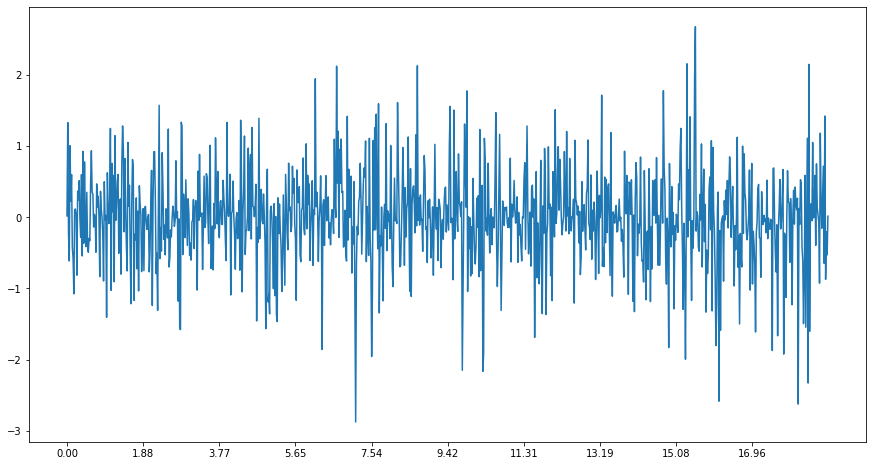

In [7]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, X(t))
ax.set_xticks(t_ticks)
plt.show()

In [8]:
#### Autocorrelación en el momento 0 debería de ser 1

T = 0

MSG = """
Este es el calculo usando la solución analitica: {}
"""
corr = 0.5*np.mean(A**2)*np.cos(wc*T)

print(MSG.format(corr))


MSG = """
Este es el calculo usando la solución númerica: {}
"""

nominator = np.mean( X(t)*X(t+T) )

print(MSG.format(nominator))

"""
El valor esperado del desarrollo analitico y númerico estan próximos.
"""


Este es el calculo usando la solución analitica: 0.45936869278035647


Este es el calculo usando la solución númerica: 0.4497684459967031



'\nEl valor esperado del desarrollo analitico y númerico estan próximos.\n'

## Cambiar función de agregación

En el ejemplo anterior use la media para comparar el caso continuo con el discreto, me gustaría en vez de usar el
valor esperado probar con la sumatoria de la función para poder aplicar el mismo coeficiente de correlación del caso discreto con variables continuas

<img src="images/example-integral-4.png"/>

#### La función analitica queda así

$\int{A^2}$ · $\left( \dfrac{t}{2}cos(T wc) - \dfrac{sin(2\theta + wc(2t +T))}{4wc}\right)$

Debido a que T es 0

$\int{A^2}$ · $\left( \dfrac{t}{2} - \dfrac{sin(2\theta + wc(2t))}{4wc}\right)$

Debido a que wc es 1

$\int{A^2}$ · $\left( \dfrac{t}{2} - \dfrac{sin(2\theta + 2t)}{4}\right)$

$\int{A^2}$ · $\left( \dfrac{t}{2} - \dfrac{sin(2(t + \theta))}{4}\right)$

In [9]:
exp_1 = np.sum(A**2)
exp_2 = t[-1]/2

## Metí elpromedio porque no se como reducir el teta luego de haber integrado
exp_3 = np.mean(np.sin(2*(t[-1] + Th))/4)


MSG = """
Los resultados estan muy alejados, estoy haciendo algo mal con la variable aleatoria {}
"""

print(MSG.format((exp_1 * (exp_2 - exp_3))))


MSG = """
Este es el calculo discreto de la función con el ruido aleatorio {} el resultados es 10 veces menor que el obtenido por la vía analitica.
"""

nominator = np.sum( X(t)*X(t+T) )

print(MSG.format(nominator))



Los resultados estan muy alejados, estoy haciendo algo mal con la variable aleatoria 8649.074678436786


Este es el calculo discreto de la función con el ruido aleatorio 449.7684459967031 el resultados es 10 veces menor que el obtenido por la vía analitica.



## Verificar usando una función mas simple

Voy a usar una recta con pendiente 1 para empezar

In [84]:
N = 1000

A = np.random.normal(0, 1, N)
wc = 1
X = lambda t: [A[i]*wc*t[i] for i in range(t.shape[0])]

In [85]:
t = np.arange(0, 6*np.pi, 6*np.pi/N)
t_ticks = np.arange(0, 6*np.pi, 6*np.pi/10)

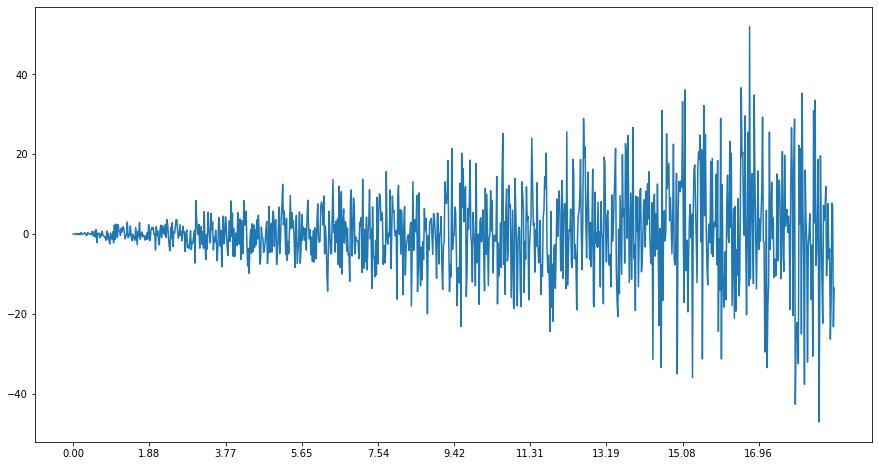

In [86]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, X(t))
ax.set_xticks(t_ticks)
plt.show()

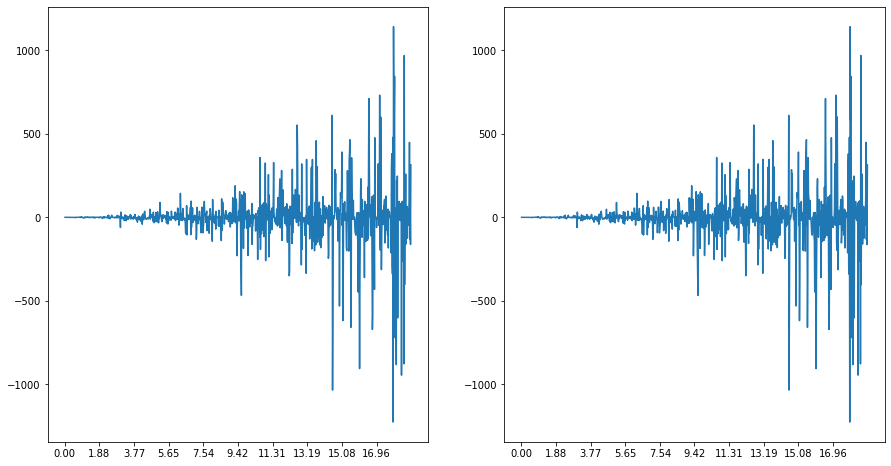

In [134]:
#### Autocorrelación: Gráfica

#### Las funciones solo se parecen cuando tau es 0
T = 1

## Esta calculando la integral discreta de la función de correlación
discrete_corr = np.array([ X(t)[i] * X(t)[i+T] for i in range(t.shape[0] - T) ])

## Al momento de modelarlo tengo que entender la variable aleatoria como si fueran 2
continuous_corr =  np.array([ A[i+T]* A[i] * wc**2 * t[i]*t[i + T]  for i in range(t.shape[0] - T) ])

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1, 2, 1)
ax.plot(t[T:], discrete_corr)
ax.set_xticks(t_ticks)

ax = fig.add_subplot(1, 2, 2)
ax.plot(t[T:], continuous_corr)
ax.set_xticks(t_ticks)


plt.show()

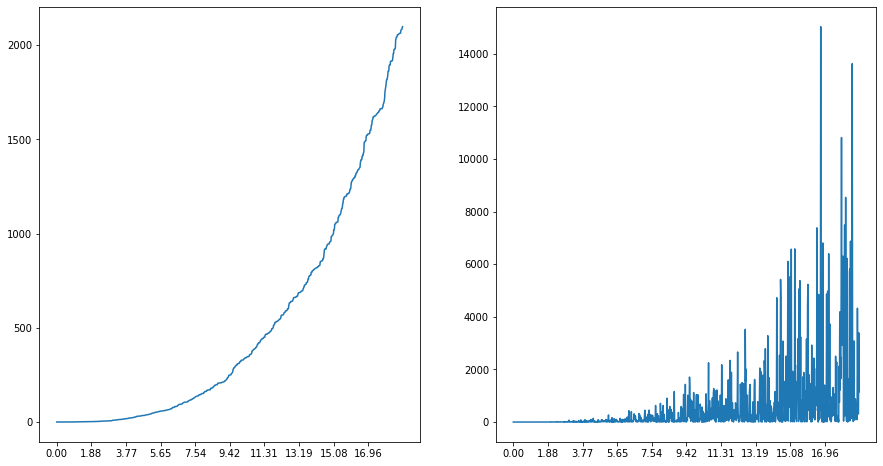

In [140]:
#### Autocorrelación: Gráfica

#### Las funciones solo se parecen cuando tau es 0
T = 0

## Esta calculando la integral discreta de la función de correlación
discrete_corr = np.cumsum(np.array([ X(t)[i] * X(t)[i+T] for i in range(t.shape[0] - T) ]) * np.mean(t[1:] - t[:-1]))

## No he podido añadirle el ruido a la versión continua
continuous_corr = np.array([ A[i]*A[i + T] * wc**2 * (t[i]**3/3 + (t[i]**2 * T)/2)  for i in range(t.shape[0] - T) ])

# discrete_corr = np.array([ X(t)[i] * X(t+T)[i] for i in range(t.shape[0]) ])
# continuous_corr =  np.array([ A[i]**2 * ( (t[i]**3)/3 + (t[i]**2 * T)/2 ) for i in range(t.shape[0]) ])

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1, 2, 1)
ax.plot(t[T:], discrete_corr)
ax.set_xticks(t_ticks)

ax = fig.add_subplot(1, 2, 2)
ax.plot(t[T:], continuous_corr)
ax.set_xticks(t_ticks)


plt.show()

In [119]:
#### Autocorrelación suma de la función

MSG = """
Este es el calculo usando la solución analitica: {}
"""
nominator = continuous_corr[-1] - continuous_corr[0]

print(MSG.format(corr))


MSG = """
Este es el calculo usando la solución númerica: {}
"""

nominator = discrete_corr[-1] - discrete_corr[0]
print(MSG.format(nominator))


Este es el calculo usando la solución analitica: 2098.159417801148


Este es el calculo usando la solución númerica: 2429.9958858799196

